In [9]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline  
matplotlib.rcParams['figure.figsize'] = [10., 5.]
matplotlib.rcParams["font.size"] = "16"
matplotlib.rcParams["lines.linewidth"] = "3"
matplotlib.rcParams["axes.grid"] = True

df = pd.read_csv('sliding_friction.csv')
df = df.abs()

series = {}
for key in df:
    series[key] = df[key].values.tolist()
    
    
for key in series:
    
    new_s = []
    # Filter data before start of experiment
    for d in series[key]:
        if d >= 0.5:
            new_s.append(d)
    series[key] = new_s
    
for key in series:
    series[key] = np.array(series[key])

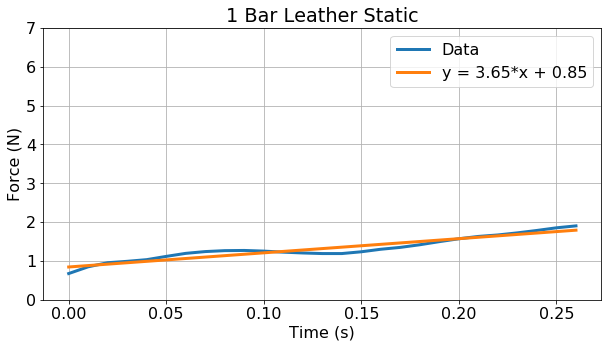

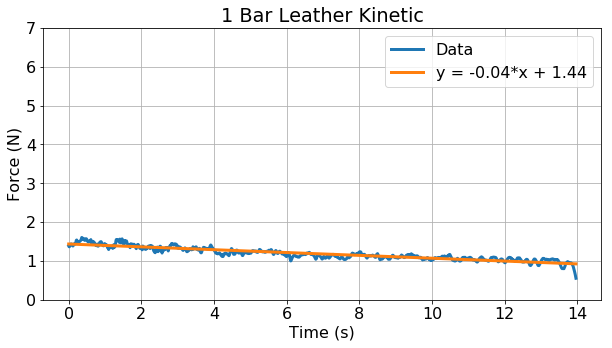

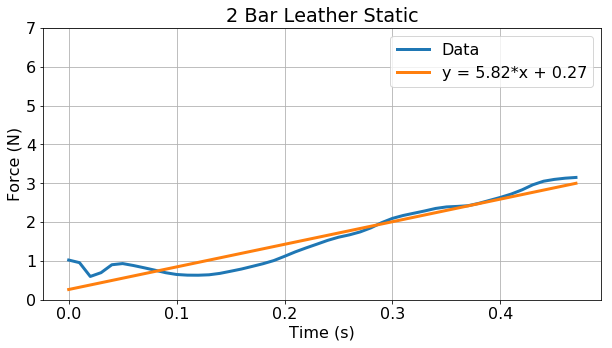

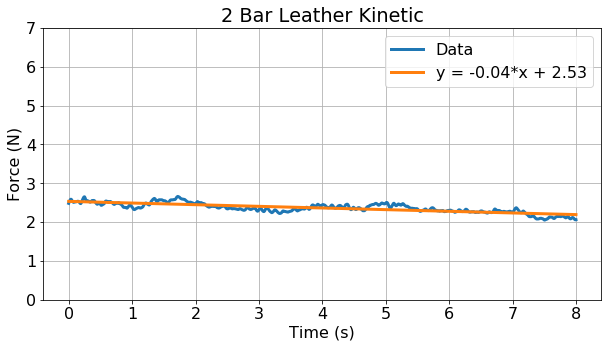

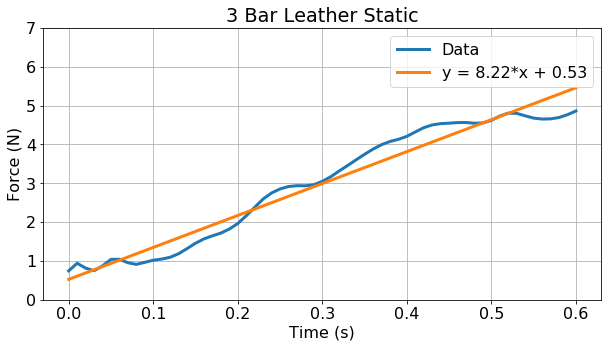

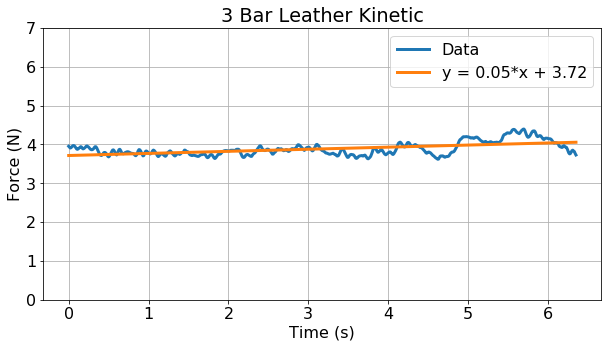

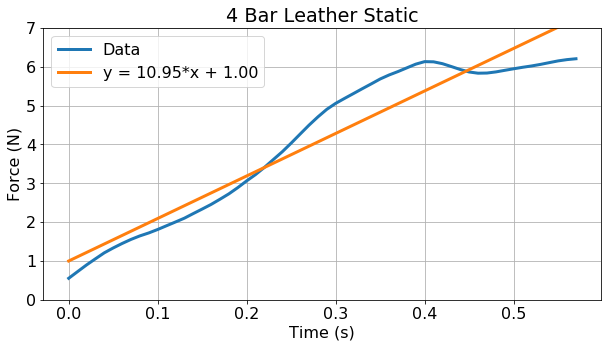

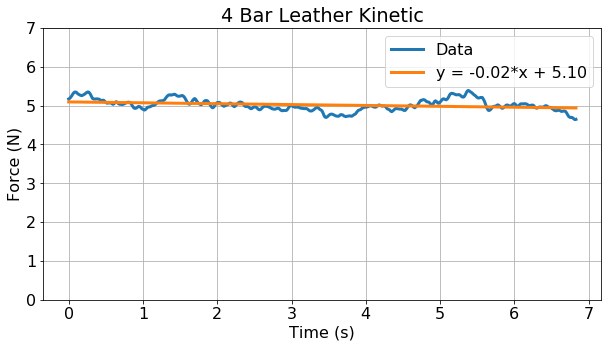

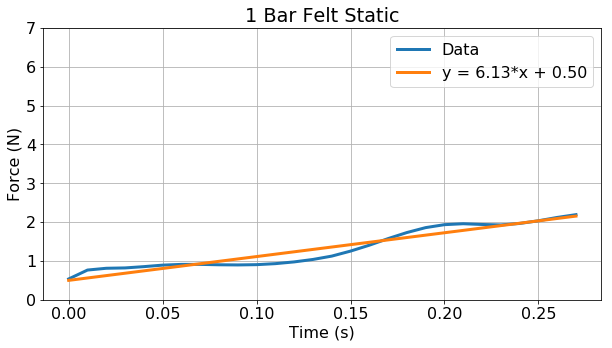

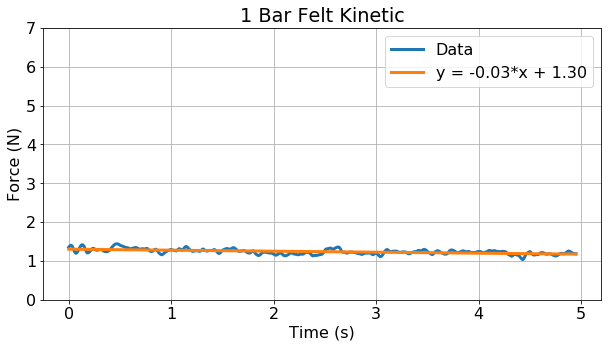

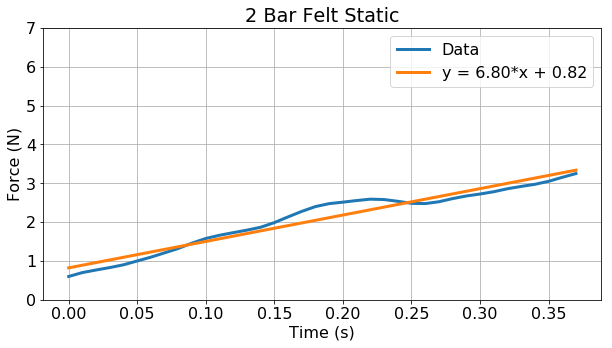

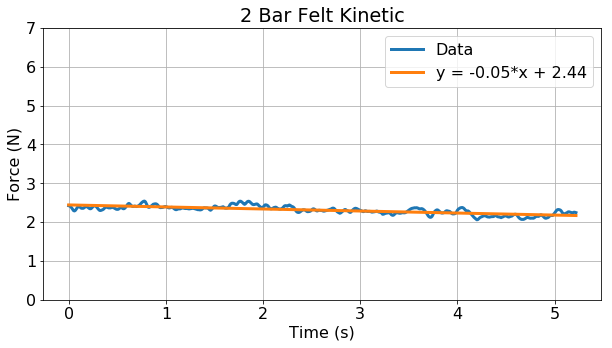

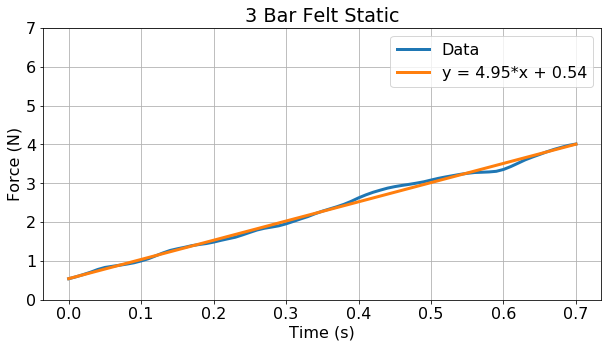

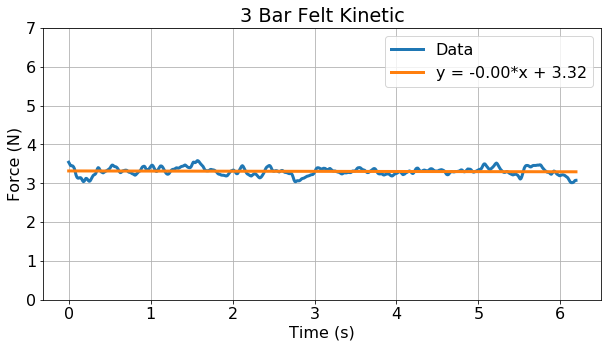

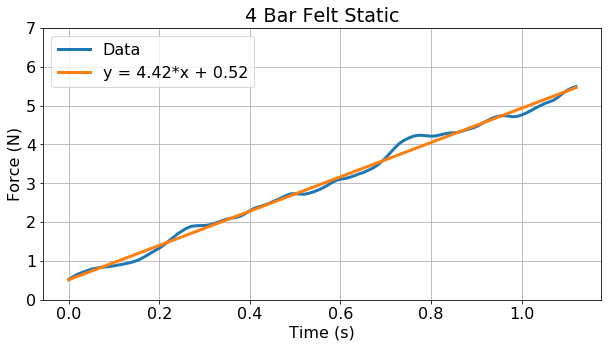

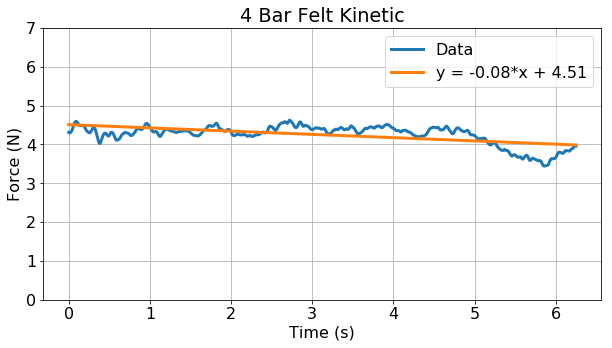

In [11]:
def linear_function(x, m, b):
    return m*x + b

def linear_fit_plot(key, series, name, x_freq=100., save=False):
    y_vals = series
    x_vals = np.arange(y_vals.shape[0])
    x_vals = x_vals / x_freq
    
    reg = linear_model.LinearRegression()
    reg.fit(x_vals.reshape((x_vals.shape[0], 1)), y_vals.reshape((y_vals.shape[0], 1)))

    m = reg.coef_[0]
    b = reg.intercept_
    
    linear_vals = np.zeros((y_vals.shape[0]))
    for x_idx, x in enumerate(x_vals):
        linear_vals[x_idx] = linear_function(x, m, b)
        
    plt.plot(x_vals, y_vals)
    plt.plot(x_vals, linear_vals)
    axes = plt.gca()
    axes.set_ylim([0, 7])
    plt.ylabel('Force (N)')
    plt.xlabel('Time (s)')
    
    legend_a = "y = %.2f*x + %.2f" % (m, b)
    legend_b = "Data"
    plt.legend([legend_b, legend_a])
    title = key + " " + name
    plt.title(title)
    
    if save:
        plt.savefig(title)

    plt.show()
    

for key in series:
    s = series[key]
    
    argmax = np.argmax(s)
    
    plot(key, series[key][0:argmax], 'Static')
    plot(key, series[key][argmax+50:], 'Kinetic')



